In [2]:
using HarmonicBalance

In [10]:
@variables ω1, ω2, t, T, ω, F, γ, Δω, α1, α2, α12, x(t), y(t), k;

In [16]:
# the equation of motion

natural_equation = [ d(d(x, t),t) + ω1^2 * x + γ*d(x,t) + α1*x^3 - k*y, 
    d(d(y,t),t) + ω2^2*y + γ*d(y,t) + α2*y^3 - k*x ]

forces = [F*cos(ω*t), F*cos(ω*t)]

diff_eq = DifferentialEquation(natural_equation - forces, [x, y])

add_harmonic!(diff_eq, x, ω) # x will rotate at ω
add_harmonic!(diff_eq, y, ω) # y will rotate at ω

System of 2 differential equations
Variables:       x(t), y(t)
Harmonic ansatz: x(t) => ω;   y(t) => ω;   

α1*(x(t)^3) + (ω1^2)*x(t) + γ*Differential(t)(x(t)) + Differential(t)(Differential(t)(x(t))) - k*y(t) - F*cos(t*ω) ~ 0
α2*(y(t)^3) + (ω2^2)*y(t) + γ*Differential(t)(y(t)) + Differential(t)(Differential(t)(y(t))) - F*cos(t*ω) - k*x(t) ~ 0


In [17]:
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α1, ω, γ, ω1, k, F, α2, ω2

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)
y(t) = u2(T)*cos(ωt) + v2(T)*sin(ωt)

Harmonic equations:

(ω1^2)*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α1*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α1*(v1(T)^2)*u1(T) - F - k*u2(T) - (ω^2)*u1(T) ~ 0

γ*Differential(T)(v1(T)) + (ω1^2)*v1(T) + (3//4)*α1*(v1(T)^3) + (3//4)*α1*(u1(T)^2)*v1(T) - (ω^2)*v1(T) - k*v2(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0

γ*Differential(T)(u2(T)) + (ω2^2)*u2(T) + (3//4)*α2*(u2(T)^3) + γ*ω*v2(T) + (2//1)*ω*Differential(T)(v2(T)) + (3//4)*α2*(v2(T)^2)*u2(T) - F - k*u1(T) - (ω^2)*u2(T) ~ 0

γ*Differential(T)(v2(T)) + (ω2^2)*v2(T) + (3//4)*α2*(v2(T)^3) + (3//4)*α2*(u2(T)^2)*v2(T) - k*v1(T) - (2//1)*ω*Differential(T)(u2(T)) - (ω^2)*v2(T) - γ*ω*u2(T) ~ 0


# solving the algebraic equations

In [19]:
fixed = (ω1 => 1., ω2 => 1.05, γ => 2E-3, F => 1E-2, α1 => 1E-1, α2 => 1E-1, k => 5E-2)
varied = ω => LinRange(0.9,1.2,100)
@time result = get_steady_states(harmonic_eq, varied, fixed)

Tracking 81 paths... 100%|██████████████████████████████| Time: 0:00:11
  # paths tracked:                  81
  # non-singular solutions (real):  11 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         11 (0)
 94.901780 seconds (125.53 M allocations: 8.971 GiB, 3.31% gc time, 99.37% compilation time: 1% of which was recompilation)


A steady state result for 100 parameter points

Solution branches:   11
   of which real:    7
   of which stable:  4

Classes: stable, physical, Hopf, binary_labels


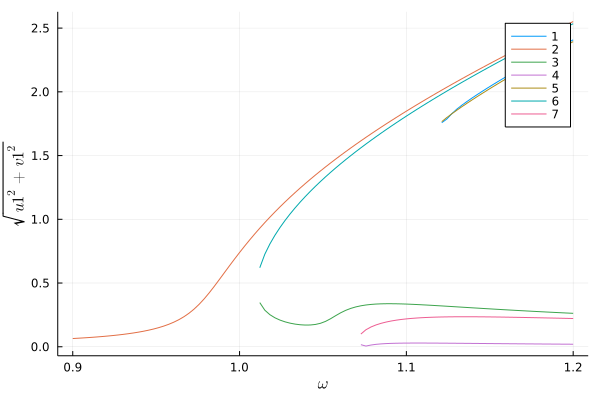

In [20]:
plot(result, x="ω", y="sqrt(u1^2 + v1^2)", classes=["physical", "stable"])

In [14]:
# select a solution and evolve from it
s = result[75][5];

sweep = HarmonicBalance.TimeEvolution.ParameterSweep(ω => (s[ω], 0.95), (0, 1E5))
problem = HarmonicBalance.TimeEvolution.ODEProblem(harmonic_eqs, s, timespan=(0,1E5), sweep=sweep)
time_soln = HarmonicBalance.TimeEvolution.solve(problem,saveat=10);


 73.497931 seconds (305.46 M allocations: 11.022 GiB, 4.61% gc time, 0.05% compilation time)


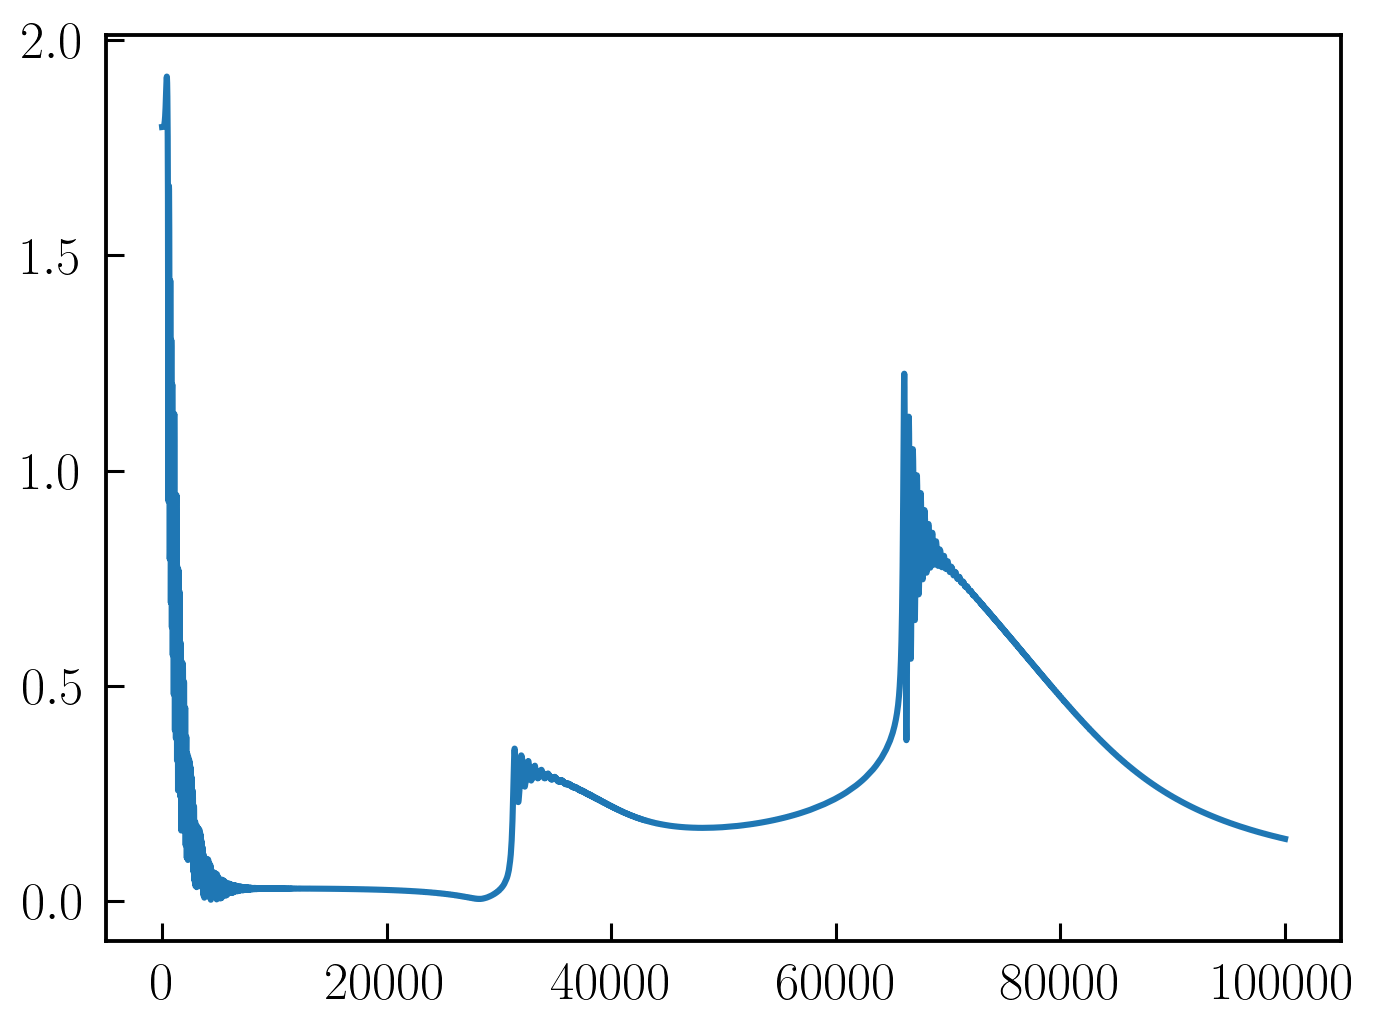

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f74e231ca90>

In [15]:
plot(time_soln, "sqrt(u1^2 + v1^2)", harmonic_eq)